In [1]:
#1
import matplotlib
from matplotlib import pylab
import pandas as pd

cols = ['Season', 'TeamID', 'Wins', 'Losses', 'PPG', 'PAPG', 'RPG', 'APG', 'SPG', 'BPG', 'PFPG', 'TOPG', 'SOS', 'FGP']
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

temp_df = pd.read_csv("./MRegularSeasonDetailedResults.csv",
                    names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")

tourney_temp_df = pd.read_csv("./MNCAATourneyDetailedResults.csv",
                        names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                        encoding = "ISO-8859-1")

seeds_df = pd.read_csv("./MNCAATourneySeeds.csv",
                    names=['Season', 'Seed', 'TeamID'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")

reg_season_df = temp_df.drop(labels=0, axis=0)
tourney_df = tourney_temp_df.drop(labels=0, axis=0)
seeds_df = seeds_df.drop(labels=0, axis=0)

team_avgs = pd.DataFrame(columns=cols)
reg_season_df['Season'] = pd.to_numeric(reg_season_df['Season'])
tourney_df['Season'] = pd.to_numeric(tourney_df['Season'])
seeds_df['Season'] = pd.to_numeric(seeds_df['Season'])
seeds_df['TeamID'] = pd.to_numeric(seeds_df['TeamID'])

for year in years:
    year_df = reg_season_df[reg_season_df['Season'] == year]
    tourney_year_df = tourney_df[tourney_df['Season'] == year]
    dictionary = {}
    for index, row in tourney_year_df.iterrows():
        #print(row['WTeamID'])
        dictionary[int(row['WTeamID'])] = 1
        dictionary[int(row['LTeamID'])] = 1
    
    for key in dictionary:
        team_1211W = year_df[year_df['WTeamID'].apply(pd.to_numeric) == key]
        team_1211L = year_df[year_df['LTeamID'].apply(pd.to_numeric) == key]
        
        #print(f"key: ", key)
        #print(f"year: ", year)
        #print(f"w_df: ", team_1211W)
        #print(f"l_df: ", team_1211L)
    
        team_1211_Wdf = team_1211W[['Season', 'WTeamID', 'WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].apply(pd.to_numeric)
        team_1211_Ldf = team_1211L[['Season', 'LTeamID', 'LScore', 'WScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].apply(pd.to_numeric)


        
        w_sum = team_1211_Wdf.sum(axis=0, numeric_only=True)
        
        l_sum = {'Season': 0, 'LTeamID': 0, 'LScore': 0, 'WScore': 0, 'LFGM': 0, 'LFGA': 0, 'LFGM3': 0, 'LFGA3': 0, 'LFTM': 0, 'LFTA': 0, 'LOR': 0, 'LDR': 0, 'LAst': 0, 'LTO': 0, 'LStl': 0, 'LBlk': 0, 'LPF': 0}
        if not team_1211L.empty:
            l_sum = team_1211_Ldf.sum(axis=0, numeric_only=True)
        
        tot_games = (len(team_1211_Wdf.index) + len(team_1211_Ldf.index))

        #print(f"w_sum: ", w_sum)
        #print(f"l_sum: ", l_sum)
        season_total = (w_sum['Season'] + l_sum['Season']) / tot_games

        id_total = (w_sum['WTeamID'] + l_sum['LTeamID']) / tot_games
        score_total = (w_sum['WScore'] + l_sum['LScore']) / tot_games
        pa_total = (w_sum['LScore'] + l_sum['WScore']) / tot_games
        rebs_total = (w_sum['WOR'] + l_sum['LOR'] + w_sum['WDR'] + l_sum['LDR']) / tot_games
        ast_total = (w_sum['WAst'] + l_sum['LAst']) / tot_games
        stl_total = (w_sum['WStl'] + l_sum['LStl']) / tot_games
        blk_total = (w_sum['WBlk'] + l_sum['LBlk']) / tot_games
        pf_total = (w_sum['WPF'] + l_sum['LPF']) / tot_games
        to_total = (w_sum['WTO'] + l_sum['LTO']) / tot_games
        fgp_total = ((w_sum['WFGM'] + l_sum['LFGM']) / (w_sum['WFGA'] + l_sum['LFGA']))

        sos_temp = 0
        #d = {'Season': [season_total], 'TeamID': [id_total], 'Wins': [len(team_1211_Wdf.index)], 'Losses': [len(team_1211_Ldf.index)], 'PPG': [score_total], 'PAPG': [pa_total], 'RPG': [rebs_total], 'APG': [ast_total], 'SPG': [stl_total], 'BPG': [blk_total], 'PFPG': [pf_total], 'TOPG': [to_total]}
        #temp_df = pd.DataFrame(data=d)
        team_avgs.loc[len(team_avgs.index)] = [season_total, id_total, len(team_1211_Wdf.index), len(team_1211_Ldf.index), score_total, pa_total, rebs_total, ast_total, stl_total, blk_total, pf_total, to_total, sos_temp, fgp_total]
        #print(rows)

team_avgs

#regular season 2022
reg_2022_df = pd.read_csv("./2022RegularSeason.csv",
                    names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")
reg_2022_df = reg_2022_df.drop(labels=0, axis=0)
tourney_team_ids = [1211, 1112,1242,1124, 1120, 1246,1437, 1181, 1458, 1397,1345,1403,1417, 1228, 1344, 1116, 1163, 1222, 1388, 1234, 1104, 1261, 1400, 1161, 1425, 1293,1277, 1326, 1129, 1314, 1361,1371, 1166, 1395, 1266, 1272, 1362, 1274, 1260, 1172,1235, 1276,1461,1353,1231, 1439, 1323,1412,1350,1308,1151, 1355, 1436,1103, 1255,1463, 1159, 1286, 1174,1389,1240,1168,1209, 1313, 1460, 1136,1411, 1394]
team_avgs_2022 = pd.DataFrame(columns=cols)

for key in tourney_team_ids:
    team_wins = reg_2022_df[reg_2022_df['WTeamID'] == str(key)]
    team_losses = reg_2022_df[reg_2022_df['LTeamID'] == str(key)]
    
    team_win_df = team_wins[['Season', 'WTeamID', 'WScore', 'LScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].apply(pd.to_numeric)
    team_loss_df = team_losses[['Season', 'LTeamID', 'LScore', 'WScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].apply(pd.to_numeric)

    w_sum = team_win_df.sum(axis=0, numeric_only=True)

    l_sum = {'Season': 0, 'LTeamID': 0, 'LScore': 0, 'LFGM': 0, 'LFGA': 0, 'LFGM3': 0, 'LFGA3': 0, 'LFTM': 0, 'LFTA': 0, 'LOR': 0, 'LDR': 0, 'LAst': 0, 'LTO': 0, 'LStl': 0, 'LBlk': 0, 'LPF': 0}
    if not team_losses.empty:
        l_sum = team_loss_df.sum(axis=0, numeric_only=True)

    tot_games = (len(team_win_df.index) + len(team_loss_df.index))
    season_total = (int(w_sum['Season']) + int(l_sum['Season'])) / tot_games
    id_total = (w_sum['WTeamID'] + l_sum['LTeamID']) / tot_games
    score_total = (w_sum['WScore'] + l_sum['LScore']) / tot_games
    pa_total = (w_sum['LScore'] + l_sum['WScore']) / tot_games
    rebs_total = (w_sum['WOR'] + l_sum['LOR'] + w_sum['WDR'] + l_sum['LDR']) / tot_games
    ast_total = (w_sum['WAst'] + l_sum['LAst']) / tot_games
    stl_total = (w_sum['WStl'] + l_sum['LStl']) / tot_games
    blk_total = (w_sum['WBlk'] + l_sum['LBlk']) / tot_games
    pf_total = (w_sum['WPF'] + l_sum['LPF']) / tot_games
    to_total = (w_sum['WTO'] + l_sum['LTO']) / tot_games
    fgp_total = ((w_sum['WFGM'] + l_sum['LFGM']) / (w_sum['WFGA'] + l_sum['LFGA']))
    sos_temp = 0
    
    team_avgs_2022.loc[len(team_avgs_2022.index)] = [season_total, id_total, len(team_win_df.index), len(team_loss_df.index), score_total, pa_total, rebs_total, ast_total, stl_total, blk_total, pf_total, to_total, sos_temp, fgp_total]
team_avgs_2022
    

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Season  TeamID  Wins  Losses        PPG       PAPG        RPG        APG  \
0   2022.0  1211.0  26.0     3.0  87.827586  65.344828  41.482759  18.206897   
1   2022.0  1112.0  31.0     3.0  84.558824  67.529412  41.352941  19.911765   
2   2022.0  1242.0  28.0     6.0  78.588235  68.147059  37.352941  15.441176   
3   2022.0  1124.0  26.0     6.0  76.500000  63.625000  37.125000  15.843750   
4   2022.0  1120.0  27.0     5.0  78.718750  67.031250  39.937500  14.593750   
..     ...     ...   ...     ...        ...        ...        ...        ...   
63  2022.0  1313.0  24.0     6.0  75.100000  63.733333  38.766667  12.633333   
64  2022.0  1460.0  21.0    13.0  75.470588  71.058824  34.882353  13.941176   
65  2022.0  1136.0  22.0     9.0  77.903226  72.741935  41.548387  14.096774   
66  2022.0  1411.0  18.0    12.0  69.233333  65.500000  39.533333  10.833333   
67  2022.0  1394.0  23.0    11.0  76.911765  69.941176  38.352941  15.029412   

         SPG       BPG       PFPG       TOPG  SOS       FGP  
0   6.655172  5.862069  15.413793  11.758621  0.0  0.527333  
1   6.705882  5.705882  16.470588  13.176471  0.0  0.495927  
2   6.411765  4.147059  15.911765  12.500000  0.0  0.480988  
3   8.812500  3.406250  15.843750  12.500000  0.0  0.463552  
4   8.781250  7.937500  18.562500  12.093750  0.0  0.439528  
..       ...       ...        ...        ...  ...       ...  
63  6.700000  3.666667  17.666667  14.000000  0.0  0.465769  
64  5.764706  2.941176  14.382353  12.294118  0.0  0.464677  
65  6.322581  4.451613  16.806452  13.903226  0.0  0.436663  
66  5.566667  5.000000  17.800000  14.933333  0.0  0.436854  
67  8.500000  1.735294  20.264706  14.205882  0.0  0.444983  

[68 rows x 14 columns]

In [2]:
#2

#SoS Calculation
def SoS_calc(input_df, output_df, year_range = years): # input_df is the game by game df, output_df is the team_avgs df
    
    sos_dict = {}
    input_df['Season'] = pd.to_numeric(input_df['Season'])
    
    for year in year_range:
        working_df = input_df[input_df['Season'] == year]
        working_df = working_df.filter(["WTeamID", "LTeamID"])

        for row in working_df.itertuples(index=False):
            winner = int(row[0])
            loser = int(row[1])

            if winner not in sos_dict:
                temp_sos = {"opp_list": [loser], "wins" : 1, "losses" : 0, "win%" : 0, "ow%" : 0, "oow%" : 0, "sos" : 0}
                sos_dict[winner] = temp_sos.copy()
                temp_sos.clear()
            else:
                sos_dict[winner]["opp_list"].append(loser)
                sos_dict[winner]["wins"] += 1

            if loser not in sos_dict:
                temp_sos = {"opp_list": [winner], "wins" : 0, "losses" : 1, "win%" : 0, "ow%" : 0, "oow%" : 0, "sos" : 0}
                sos_dict[loser] = temp_sos.copy()
                temp_sos.clear()                    
            else:
                sos_dict[loser]["opp_list"].append(winner)
                sos_dict[loser]["losses"] += 1

        for calc in ["win%", "ow%", "oow%", "sos"]:
            for k, d in sos_dict.items():
                if calc == "win%":
                    d["win%"] = d["wins"] / (d["wins"] + d["losses"])

                if calc == "ow%":
                    sum_wp = 0
                    num = 0
                    for opp in d["opp_list"]:
                        sum_wp += sos_dict[opp]["win%"]
                        num += 1
                    d["ow%"] = (sum_wp / num)

                if calc == "oow%":
                    sum_ow = 0
                    num = 0
                    for opp in d["opp_list"]:
                        sum_ow += sos_dict[opp]["ow%"]
                        num += 1
                    d["oow%"] = (sum_ow / num)
                    d["sos"] = (d["ow%"] * 2 + d["oow%"]) / 3


        sos_year_df = output_df[output_df["Season"] == year]
        team_list = sos_year_df["TeamID"].tolist()
        for row in output_df[output_df["Season"] == year].itertuples():
            output_df.iat[row.Index, output_df.columns.get_loc("SOS")] = sos_dict[row[2]]["sos"]



        sos_dict.clear()
            
        
    return output_df
        
team_avgs = SoS_calc(reg_season_df, team_avgs)
print(team_avgs)
team_avgs_2022 = SoS_calc(reg_2022_df, team_avgs_2022, [2022])
print(team_avgs_2022)

     Season  TeamID  Wins  Losses        PPG       PAPG        RPG        APG  \
0    2006.0  1104.0  17.0    12.0  69.965517  67.137931  37.000000  12.206897   
1    2006.0  1266.0  19.0    10.0  74.206897  69.655172  35.551724  15.275862   
2    2006.0  1130.0  25.0     7.0  74.531250  66.875000  35.187500  17.812500   
3    2006.0  1334.0  22.0     7.0  73.724138  63.586207  35.172414  15.655172   
4    2006.0  1181.0  30.0     3.0  82.515152  68.969697  32.909091  15.363636   
..      ...     ...   ...     ...        ...        ...        ...        ...   
891  2019.0  1205.0  20.0    11.0  75.774194  73.419355  32.870968  13.612903   
892  2019.0  1439.0  24.0     8.0  74.000000  62.093750  32.593750  15.343750   
893  2019.0  1387.0  23.0    12.0  67.057143  63.742857  39.771429  12.971429   
894  2019.0  1449.0  26.0     8.0  69.823529  64.382353  31.588235  11.676471   
895  2019.0  1429.0  27.0     6.0  79.030303  67.090909  40.060606  17.090909   

          SPG       BPG    

In [3]:
#3
import random

random.seed()

# make a new empty dataframe to hold all of the data

# note: "Winner" column will always be '1' because the winning team is always listed first;
# it's included just for a classification metric for the machine learning
train_cols = ["Season", "Team1ID", "Team2ID", "Winner", "Team1W", "Team1L", "Team1PPG", "Team1PAPG", "Team1RPG", "Team1APG", "Team1SPG", \
              "Team1BPG", "Team1PFPG", "Team1TOPG", "Team1SOS", "Team1FGP", "Team2W", "Team2L", "Team2PPG", "Team2PAPG", "Team2RPG", "Team2APG", "Team2SPG",\
              "Team2BPG", "Team2PFPG", "Team2TOPG", "Team2SOS", "Team2FGP"]



# we just need three columns from our tourney_df
trim_tourney_df = tourney_df[["Season", "WTeamID", "LTeamID"]]
trim_tourney_df



def trainingData():
    train_DF_temp = pd.DataFrame(columns=train_cols)
    for year in years:
        avg_year_df = team_avgs[team_avgs['Season'] == year]
        seeds_year_df = seeds_df[seeds_df['Season'] == year]
        tourney_year_df = trim_tourney_df[trim_tourney_df['Season'] == year].apply(pd.to_numeric)

        for index, row in tourney_year_df.iterrows():
            # make a list that we can insert into the new dataframe
            #first 4 values (last value is the "Winner" classification which is randomly chosen)
            team1_seed = seeds_year_df[seeds_year_df['TeamID'] == row["WTeamID"]].values.tolist()[0][1]
            team2_seed = seeds_year_df[seeds_year_df['TeamID'] == row["LTeamID"]].values.tolist()[0][1]
            team1_prefix = team1_seed[0:1]
            team2_prefix = team2_seed[0:1]
            
            team1_seed = int(team1_seed[1:3])
            team2_seed = int(team2_seed[1:3])
            
            #choose which team is first based on seed
            winning_team = 2
            losing_team = 1
            
            if team1_seed < team2_seed:
                winning_team = 1
                losing_team = 2
            elif team2_seed == team1_seed:
                if team1_prefix > team2_prefix:
                    winning_team = 1
                    losing_team = 2
                    

            #properly put winning team into correct row
            team_id = ["", "WTeamID", "LTeamID"]
            temp_list = [year, row[team_id[winning_team]], row[team_id[losing_team]], winning_team]
            team1_row = avg_year_df[avg_year_df["TeamID"] == temp_list[1]][cols[2:]].values.tolist()
            team2_row = avg_year_df[avg_year_df["TeamID"] == temp_list[2]][cols[2:]].values.tolist()
            temp_list.extend(team1_row[0])
            temp_list.extend(team2_row[0])

            # add that list to our DF
            temp_series = pd.Series(temp_list, index=train_cols)
            train_DF_temp = train_DF_temp.append(temp_series, ignore_index=True)
    return train_DF_temp

train_DF = trainingData()
print(train_DF)

train_data = train_DF[train_DF['Season'] >= 2010]
train_labels = train_data['Winner']
train_data = train_data.drop(columns=['Winner'])



#train_data
        
        

    

     Season  Team1ID  Team2ID  Winner  Team1W  Team1L   Team1PPG  Team1PAPG  \
0    2006.0   1266.0   1104.0     2.0    19.0    10.0  74.206897  69.655172   
1    2006.0   1130.0   1334.0     1.0    25.0     7.0  74.531250  66.875000   
2    2006.0   1181.0   1380.0     1.0    30.0     3.0  82.515152  68.969697   
3    2006.0   1196.0   1375.0     1.0    27.0     6.0  79.272727  64.787879   
4    2006.0   1203.0   1423.0     1.0    26.0     2.0  78.964286  66.678571   
..      ...      ...      ...     ...     ...     ...        ...        ...   
877  2019.0   1246.0   1120.0     2.0    27.0     6.0  76.727273  65.424242   
878  2019.0   1181.0   1277.0     2.0    29.0     5.0  83.500000  67.558824   
879  2019.0   1277.0   1403.0     2.0    28.0     6.0  78.823529  65.529412   
880  2019.0   1438.0   1120.0     1.0    29.0     3.0  71.843750  55.062500   
881  2019.0   1438.0   1403.0     1.0    29.0     3.0  71.843750  55.062500   

      Team1RPG   Team1APG  ...   Team2PPG  Team2PAP

In [4]:
#4
d = {'Team1ID': [1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1246,1112,1371,1222,1228,1161,1397,1326,1437,1242,1361,1234,1344,1261,1458,1425,1120,1211,1116,1403,1181,1124,1417,1345,1293,1112,1228,1397,1437,1242,1344,1458,1120,1211,1181,1417,1345,1112,1437,1242,1274,1181,1314,1437,1242,1181,1242,1242], 'Team2ID': [1209,1272,1308,1436,1323,1286,1172,1168,1313,1266,1231,1103,1439,1463,1362,1389,1460,1395,1412,1151,1276,1255,1260,1174,1411,1166,1350,1355,1235,1159,1274,1240,1272,1308,1323,1277,1314,1388,1400,1389,1395,1222,1276,1326,1166,1350,1235,1274,1116,1403,1314,1389,1222,1276,1344,1235,1116,1389,1222,1274,1314,1437,1314]}
test_cols = ["Season", "Team1ID", "Team2ID", "Team1W", "Team1L", "Team1PPG", "Team1PAPG", "Team1RPG", "Team1APG", "Team1SPG", \
              "Team1BPG", "Team1PFPG", "Team1TOPG", "Team1SOS", "Team1FGP", "Team2W", "Team2L", "Team2PPG", "Team2PAPG", "Team2RPG", "Team2APG", "Team2SPG",\
              "Team2BPG", "Team2PFPG", "Team2TOPG", "Team2SOS", "Team2FGP"]
temp_tourn_df = pd.DataFrame(data=d)
#winners = [2,1,1,2,1,2,2,1,2,1,1,1,1,2,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,2,2,1,2,1,2,1,1,2,2,2,2,2,2,2,1,1,1,2,1,2,1,1,2,2,1,2,2,2,1,2,2,1,2,1,2,2,2]
tourney_2022_df = pd.DataFrame(columns=test_cols)

for row in temp_tourn_df.iterrows():
    #Doing the same as before but without winner column
    temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
    print(f"team2: ", row[1]['Team2ID'])
    team1_row = team_avgs_2022[team_avgs_2022["TeamID"] == row[1]['Team1ID']].values.tolist()
    team2_row = team_avgs_2022[team_avgs_2022["TeamID"] == row[1]['Team2ID']].values.tolist()
    print(team2_row)
    team1_row[0].pop(0)
    team1_row[0].pop(0)
    team2_row[0].pop(0)
    team2_row[0].pop(0)

    temp_list.extend(team1_row[0])
    temp_list.extend(team2_row[0])
        
    # add that list to our DF
    temp_series = pd.Series(temp_list, index=test_cols)
    tourney_2022_df = tourney_2022_df.append(temp_series, ignore_index=True)

tourney_2022_df

team2:  1209
[[2022.0, 1209.0, 18.0, 10.0, 70.60714285714286, 64.75, 37.25, 13.535714285714286, 8.928571428571429, 4.464285714285714, 15.75, 11.857142857142858, 0.37275651662941583, 0.40264976958525345]]
team2:  1272
[[2022.0, 1272.0, 21.0, 10.0, 75.41935483870968, 68.38709677419355, 38.74193548387097, 16.06451612903226, 8.709677419354838, 5.67741935483871, 18.70967741935484, 16.35483870967742, 0.4246561585342099, 0.47068771138669674]]
team2:  1308
[[2022.0, 1308.0, 26.0, 6.0, 73.3125, 65.03125, 38.46875, 13.90625, 5.0625, 4.15625, 15.875, 14.0, 0.3758759162823933, 0.4574585635359116]]
team2:  1436
[[2022.0, 1436.0, 28.0, 5.0, 74.93939393939394, 60.303030303030305, 35.09090909090909, 15.212121212121213, 5.212121212121212, 2.515151515151515, 13.787878787878787, 9.696969696969697, 0.38604185264221097, 0.49349240780911063]]
team2:  1323
[[2022.0, 1323.0, 22.0, 10.0, 72.5, 66.84375, 34.0625, 14.15625, 5.09375, 1.875, 12.875, 10.34375, 0.43769248767808744, 0.4623955431754875]]
team2:  1286


Season  Team1ID  Team2ID  Team1W  Team1L   Team1PPG  Team1PAPG   Team1RPG  \
0   2022.0   1211.0   1209.0    26.0     3.0  87.827586  65.344828  41.482759   
1   2022.0   1129.0   1272.0    27.0     7.0  68.705882  60.764706  34.970588   
2   2022.0   1163.0   1308.0    23.0     9.0  75.187500  65.156250  40.875000   
3   2022.0   1116.0   1436.0    25.0     8.0  76.939394  68.545455  38.151515   
4   2022.0   1104.0   1323.0    19.0    13.0  79.968750  76.406250  39.968750   
..     ...      ...      ...     ...     ...        ...        ...        ...   
58  2022.0   1437.0   1222.0    26.0     7.0  72.636364  63.090909  34.939394   
59  2022.0   1242.0   1274.0    28.0     6.0  78.588235  68.147059  37.352941   
60  2022.0   1181.0   1314.0    28.0     6.0  80.176471  67.147059  38.294118   
61  2022.0   1242.0   1437.0    28.0     6.0  78.588235  68.147059  37.352941   
62  2022.0   1242.0   1314.0    28.0     6.0  78.588235  68.147059  37.352941   

     Team1APG  Team1SPG  ...   Team2PPG  Team2PAPG   Team2RPG   Team2APG  \
0   18.206897  6.655172  ...  70.607143  64.750000  37.250000  13.535714   
1   11.529412  5.911765  ...  75.419355  68.387097  38.741935  16.064516   
2   14.000000  5.968750  ...  73.312500  65.031250  38.468750  13.906250   
3   14.090909  7.727273  ...  74.939394  60.303030  35.090909  15.212121   
4   14.625000  7.000000  ...  72.500000  66.843750  34.062500  14.156250   
..        ...       ...  ...        ...        ...        ...        ...   
58  12.060606  6.242424  ...  75.823529  58.882353  39.235294  16.735294   
59  15.441176  6.411765  ...  74.818182  71.030303  30.454545  14.030303   
60  16.911765  6.470588  ...  77.515152  71.727273  39.757576  14.818182   
61  15.441176  6.411765  ...  72.636364  63.090909  34.939394  12.060606   
62  15.441176  6.411765  ...  77.515152  71.727273  39.757576  14.818182   

    Team2SPG  Team2BPG  Team2PFPG  Team2TOPG  Team2SOS  Team2FGP  
0   8.928571  4.464286  15.750000  11.857143  0.372757  0.402650  
1   8.709677  5.677419  18.709677  16.354839  0.424656  0.470688  
2   5.062500  4.156250  15.875000  14.000000  0.375876  0.457459  
3   5.212121  2.515152  13.787879   9.696970  0.386042  0.493492  
4   5.093750  1.875000  12.875000  10.343750  0.437692  0.462396  
..       ...       ...        ...        ...       ...       ...  
58  8.235294  5.205882  17.382353  11.323529  0.403810  0.468888  
59  8.727273  2.939394  14.939394   9.606061  0.415655  0.478192  
60  5.424242  3.848485  14.363636  11.666667  0.446561  0.452830  
61  6.242424  2.272727  15.242424  10.000000  0.489467  0.437029  
62  5.424242  3.848485  14.363636  11.666667  0.446561  0.452830  

[63 rows x 27 columns]

In [5]:
#5
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt
import numpy as np

train_DF = trainingData()

In [6]:
#6
winners = [1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,2,1,1,1,1,2,2,1,2,1,2,1,1,1,1,1,2,1,1,2,1,2,2,1,1,1,2,2,2,1,2,2,2,1,1,1,1,1,1,1,2,1,1]
vegas_winners = [1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,2,2,1,1,1,2,2,1,2,2,2,1,1,2,1,1,2,1,2,2,1,1,1,1,2,2]

vright = 0
vwrong = 0
print(len(vegas_winners))
print(len(winners))
for i in range(0,len(vegas_winners)):
    if vegas_winners[i] == winners[i]:
        vright += 1
    else:
        vwrong += 1

#print(f"# of Games correct: ",right)
#print(f"# of Games missed: ",wrong)
#print(f"Accuracy: ", (right) / (right + wrong))

print(f"Vegas # of Games correct: ",vright)
print(f"Vegas # of Games missed: ",vwrong)
print(f"Vegas Accuracy: ", (vright) / (vright + vwrong))

63
63
Vegas # of Games correct:  35
Vegas # of Games missed:  28
Vegas Accuracy:  0.5555555555555556


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

def accuracy(preds):
    right = 0
    wrong = 0
    for i in range(0,len(preds)):
        if preds[i] == winners[i]:
            right += 1
        else:
            wrong += 1
    return right / (right + wrong)

bayes_model = MultinomialNB().fit(train_data, train_labels)
bayes_preds = bayes_model.predict(tourney_2022_df)
print(f"Naive Bayes: ", accuracy(bayes_preds))

tree_model = DecisionTreeClassifier().fit(train_data, train_labels)
tree_preds = tree_model.predict(tourney_2022_df)
print(f"Decision Tree: ", accuracy(tree_preds))

forest_model = RandomForestClassifier().fit(train_data, train_labels)
forest_preds = forest_model.predict(tourney_2022_df)
print(f"Random Forest: ", accuracy(forest_preds))



Naive Bayes:  0.5555555555555556
Decision Tree:  0.5873015873015873
Random Forest:  0.6666666666666666


In [19]:
#7
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn import svm

xgb.set_config(verbosity=0)

def trainAndPredictXGB(classifier, test_df, sampleSize, num_games):

    predicted_games = [0] * num_games

    for i in range(sampleSize):

        train_df_year = train_DF[train_DF['Season'] >= 2010]

        X = train_df_year.drop("Season", axis=1)
        X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
        y = train_df_year["Winner"]
        y = y.astype(int)

        test_X = test_df.drop(["Season", "Team1ID", "Team2ID"], axis=1)
        #print(test_X)

        scaler = StandardScaler()
        scaled_X = scaler.fit_transform(X.values)
        scaled_test = scaler.fit_transform(test_X.values)
        X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)
        test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)
        
        #C_range = np.logspace(-2, 10, 13)
        #gamma_range = np.logspace(-9, 3, 13)
        #param_grid = dict(gamma=gamma_range, C=C_range)
        #cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
        #grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
        #grid.fit(X, y)

        #print(
        #    "The best parameters are %s with a score of %0.2f"
        #    % (grid.best_params_, grid.best_score_)
        #)

        classifier.fit(X_proc, y)

        preds = classifier.predict(test_proc)
        for i in range(len(preds)):
            if preds[i] == 1:
                predicted_games[i] += 1
        
    overall_pred = [1] * num_games
    for i in range(len(predicted_games)):
        #print(f"# Games: {predicted_games[i]}, sample_size: {sampleSize/2}")
        if predicted_games[i] < (sampleSize / 2):
            #print(f"Ovr Prediction: {overall_pred[i]}")
            overall_pred[i] = 2
    #print(overall_pred)
    return overall_pred
    
#for i in range(100):
    #svm_total += trainAndPredictXGB(svm.SVC())

In [20]:
def predictYear(classifier, year, num_games):
    
    predicted_games = [0] * num_games
    
    test_data = train_DF[train_DF['Season'] == year]
    test_labels = test_data['Winner']
    test_data = test_data.drop(columns=['Winner'])

    training_data = train_DF[train_DF['Season'] != year]
    y = training_data['Winner']

    test_X = test_data.drop(["Season", "Team1ID", "Team2ID"], axis=1)
    X = training_data.drop("Season", axis=1)
    X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
    y = y.astype(int)

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X.values)
    scaled_test = scaler.fit_transform(test_X.values)
    test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)

    X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)

    accuracy_scores = []
    from sklearn.metrics import accuracy_score

    # Model Fit
    classifier.fit(X_proc, y)

    # Model Prediction
    preds = classifier.predict(test_proc)

    #print(overall_pred)

    # Accuracy Score
    #print(preds)
    return accuracy_score(test_labels, preds)

acc_scores = []
for year in years:
    if year > 2010:
        score = predictYear(svm.SVC(C=4.6, gamma=0.01), year, 63)
        acc_scores.append(score)
print(f"Avg Accuracy: {sum(acc_scores) / len(acc_scores)}")


        

Avg Accuracy: 0.7054673721340388


In [21]:
#9

svm_preds = trainAndPredictXGB(svm.SVC(C=4.2, gamma=0.01), tourney_2022_df, 1, 63)
print(accuracy(svm_preds))

dt_preds = trainAndPredictXGB(DecisionTreeClassifier(), tourney_2022_df, 25, 63)
print(accuracy(dt_preds))

rf_preds = trainAndPredictXGB(RandomForestClassifier(), tourney_2022_df, 25, 63)
print(accuracy(rf_preds))

#xgb_preds = trainAndPredictXGB(xgb.XGBClassifier(), tourney_2022_df, 1, 63)
#print(accuracy(xgb_preds))


0.6507936507936508
0.5873015873015873
0.6507936507936508


In [24]:
#10
firstRound = {'Team1ID': [1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1246,1112,1371,1222,1228,1161,1397,1326,1437,1242,1361,1234,1344,1261,1458,1425,1120], 'Team2ID': [1209,1272,1308,1436,1323,1286,1172,1168,1313,1266,1231,1103,1439,1463,1362,1389,1460,1395,1412,1151,1276,1255,1260,1174,1411,1166,1350,1355,1235,1159,1274,1240]}
tournamentRounds = {'Round1': [1211,1272,1308,1116,1323,1403,1277,1181,1124,1314,1388,1417,1400,1345,1293,1389,1112,1395,1222,1228,1276,1397,1326,1437,1242,1166,1350,1344,1235,1458,1274,1120], \
                    'Round2': [1211,1116,1403,1181,1314,1417,1345,1389,1112,1222,1276,1437,1242,1344,1235,1274], \
                    'Round3': [1116,1181,1314,1389,1222,1437,1242,1274], \
                    'Round4': [1181,1314,1437,1242], 'Round5': [1314, 1242], 'Round6': [1242]}
seed_dict = {1211: 'W01', 1209: 'W16', 1129: 'W08', 1272: 'W09', 1163: 'W05', 1308: 'W12', 1116: 'W04', 1436: 'W13', 1104: 'W06', 1323: 'W11', 1403: 'W03', 1286: 'W14', 1277: 'W07', 1172: 'W10', 1181: 'W02', 1168: 'W15', 1124: 'X01', 1313: 'X16', 1314: 'X08', 1266: 'X09', 1388: 'X05', 1231: 'X12', 1417: 'X04', 1103: 'X13', 1400: 'X06', 1439: 'X11', 1345: 'X03', 1463: 'X14', 1293: 'X07', 1362: 'X10', 1246: 'X02', 1389: 'X15', 1112: 'Y01', 1460: 'Y16', 1371: 'Y08', 1395: 'Y09', 1222: 'Y05', 1412: 'Y12', 1228: 'Y04', 1151: 'Y13', 1161: 'Y06', 1276: 'Y11', 1397: 'Y03', 1255: 'Y14', 1326: 'Y07', 1260: 'Y10', 1437: 'Y02', 1174: 'Y15', 1242: 'Z01', 1411: 'Z16', 1361: 'Z08', 1166: 'Z09', 1234: 'Z05', 1350: 'Z12', 1344: 'Z04', 1355: 'Z13', 1261: 'Z06', 1235: 'Z11', 1458: 'Z03', 1159: 'Z14', 1425: 'Z07', 1274: 'Z10', 1120: 'Z02', 1240: 'Z15'}
bracket_df = pd.DataFrame(data=firstRound)

def tournament(classifier, round_bracket, round_num, bracket_score):
    round_df = pd.DataFrame(columns=test_cols)
    for row in round_bracket.iterrows():
        temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
        
        #ordering new teams by seed
        if round_num > 1:
            team1_seed = seed_dict[temp_list[1]]
            team2_seed = seed_dict[temp_list[2]]

            
            team1_prefix = team1_seed[0:1]
            team2_prefix = team2_seed[0:1]

            team1_seed = int(team1_seed[1:3])
            team2_seed = int(team2_seed[1:3])
            
            if team1_seed > team2_seed:
                temp = temp_list[1]
                temp_list[1] = temp_list[2]
                temp_list[2] = temp
                
                
        #print(temp_list)
        team1_row = team_avgs_2022[team_avgs_2022["TeamID"] == temp_list[1]].values.tolist()
        team2_row = team_avgs_2022[team_avgs_2022["TeamID"] == temp_list[2]].values.tolist()
        team1_row[0].pop(0)
        team1_row[0].pop(0)
        team2_row[0].pop(0)
        team2_row[0].pop(0)

        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=test_cols)
        round_df = round_df.append(temp_series, ignore_index=True)
        
    #print(round_df)
    preds = trainAndPredictXGB(classifier, round_df, 1, len(round_df.index))
    
    #if(round_num == 1):
        #return;
    
    round_dict = {'Team1ID': [], 'Team2ID': []}
    winners_arr = []
    for i in range(0, len(preds)):
        if i % 2 == 0:
            length = len(round_dict['Team1ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team1ID'].append(val)
            winners_arr.append(val)
        else:
            length = len(round_dict['Team2ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team2ID'].append(val)
            winners_arr.append(val)
    for i in range(0, len(winners_arr)):
        #print(f"Predicted: {winners_arr[i]}  Real: {tournamentRounds['Round' + str(round_num)][i]}")
        if winners_arr[i] == tournamentRounds['Round' + str(round_num)][i]:
            bracket_score += 10 * (2**(round_num - 1))
            #print(bracket_score)
    if round_num < 6:
        new_df = pd.DataFrame(data=round_dict)
        tournament(classifier, new_df, round_num+1, bracket_score)
    else:
        print(bracket_score)
        
tournament(svm.SVC(C=4.6, gamma=0.01), bracket_df, 1, 0)

#xgboost    
#eta-[0.05, 0.06, 0.11, 0.13, .15]

880


Average of 500 coin flip brackets: 315.54


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f7b1ef310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f7b1efd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5fa17a6640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f7b1b3400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5fa17a68b0>],
 'means': []}

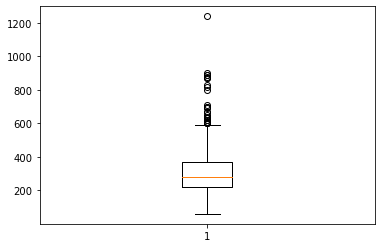

In [25]:
from random import randint

actual_winners = ( #Teams are given an index starting at the top left and ending at the bottom right
      [], #placeholder so each round can have the right index
      [0,3,5,6,9,10,12,14,16,18,20,22,24,26,28,31,32,35,36,38,41,42,44,46,48,51,53,54,57,58,61,62], #rd 1
      [0,6,10,14,18,22,26,31,32,36,41,46,48,54,57,61], #rd 2
      [6,14,18,31,36,46,48,61], #rd 3 (E8)
      [14,18,46,48], #rd 4 (F4)
      [18,48], #rd 5 (final)
      [48]) #rd 6 (winner)

# coin-flip bracket
def pick_round(teams):
    loser_list = []
    
    for i in range(0, len(teams) - 1, 2):
        loser_list.append(i + randint(0,1)) # get a list of random losers
        
    loser_list.reverse() #reverse the list so it's in reverse numerical order (so we can remove by index)
    for loser in loser_list:
        teams.pop(loser)
        
    return teams

def coin_flip(actual_winners):
    sim_tourney = list(range(0, 64))
    predicted_winners = [[]]
    score = 0
    
    for rd in range(1,7):
        sim_tourney = pick_round(sim_tourney)
        predicted_winners.append(sim_tourney[:])
    
    for rd in range(1,7):
        for game in range(0, len(predicted_winners[rd])):
            score = (score + 10 * (2 ** (rd - 1))) if predicted_winners[rd][game] == actual_winners[rd][game] else score
        
    return score

coin_flips = []

num_coin_flips = 500
for i in range(0, num_coin_flips):
    coin_flips.append(coin_flip(actual_winners))
    
print(f"Average of {num_coin_flips} coin flip brackets: {sum(coin_flips) / len(coin_flips)}")
    
from matplotlib import pyplot

pyplot.boxplot(coin_flips)

    

In [30]:
def predictByYear(classifier, round_df, year, num_games):
    
    predicted_games = [0] * num_games
    
    test_data = round_df

    training_data = train_DF[train_DF['Season'] != year]
    y = training_data['Winner']

    test_X = test_data.drop(["Season", "Team1ID", "Team2ID"], axis=1)
    X = training_data.drop("Season", axis=1)
    X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
    y = y.astype(int)

    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(X.values)
    scaled_test = scaler.fit_transform(test_X.values)
    test_proc = pd.DataFrame(scaled_test, index = test_X.index, columns = test_X.columns)

    X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)

    accuracy_scores = []
    from sklearn.metrics import accuracy_score

    # Model Fit
    classifier.fit(X_proc, y)

    # Model Prediction
    preds = classifier.predict(test_proc)
    return preds
    
def tourneyByYear(classifier, round_bracket, round_num, start_index, bracket_score, year):
    round_df = pd.DataFrame(columns=test_cols)
    for row in round_bracket.iterrows():
        temp_list = [2022, row[1]['Team1ID'], row[1]['Team2ID']]
        seeds_year_df = seeds_df[seeds_df['Season'] == year]
        
        #ordering new teams by seed
        if round_num > 1:
            #print(row[1])
            team1_seed = seeds_year_df[seeds_year_df['TeamID'] == row[1]["Team1ID"]].values.tolist()[0][1]
            team2_seed = seeds_year_df[seeds_year_df['TeamID'] == row[1]["Team2ID"]].values.tolist()[0][1]
            team1_prefix = team1_seed[0:1]
            team2_prefix = team2_seed[0:1]
            
            team1_seed = int(team1_seed[1:3])
            team2_seed = int(team2_seed[1:3])
            
            if team1_seed > team2_seed:
                temp = temp_list[1]
                temp_list[1] = temp_list[2]
                temp_list[2] = temp
                
                
        #print(temp_list)
        team1_row = team_avgs[team_avgs['Season'] == year]
        team1_row = team_avgs[team_avgs["TeamID"] == temp_list[1]].values.tolist()
        
        team2_row = team_avgs[team_avgs['Season'] == year]
        team2_row = team_avgs[team_avgs["TeamID"] == temp_list[2]].values.tolist()
        team1_row[0].pop(0)
        team1_row[0].pop(0)
        team2_row[0].pop(0)
        team2_row[0].pop(0)

        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=test_cols)
        round_df = round_df.append(temp_series, ignore_index=True)
        
    preds = predictByYear(classifier, round_df, 1, len(round_df.index))
    
    round_dict = {'Team1ID': [], 'Team2ID': []}
    winners_arr = []
    for i in range(0, len(preds)):
        if i % 2 == 0:
            length = len(round_dict['Team1ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team1ID'].append(val)
            winners_arr.append(val)
        else:
            length = len(round_dict['Team2ID'])
            val = 0
            if preds[i] == 1:
                val = round_df.iloc[i]['Team1ID']
            else:
                val = round_df.iloc[i]['Team2ID']
                
            round_dict['Team2ID'].append(val)
            winners_arr.append(val)
    tourney_year = trim_tourney_df[trim_tourney_df['Season'] == year].apply(pd.to_numeric)
    for i in range(0, len(winners_arr)):
        new_row = tourney_year.iloc[start_index + i]
        if winners_arr[i] == new_row['WTeamID']:
            bracket_score += 10 * (2**(round_num - 1))
    if round_num < 6:
        new_df = pd.DataFrame(data=round_dict)
        return tourneyByYear(classifier, new_df, round_num+1, start_index + int(32 / (2**round_num-1)), bracket_score, year)
    else:
        print(bracket_score)
        return bracket_score
        

historical_scores = []
for year in years:
    if(year > 2010):
        old_round_df = train_DF[train_DF['Season'] == year]
        old_round_df = old_round_df.head(32)
        historical_scores.append(tourneyByYear(svm.SVC(C=4.6, gamma=0.01), old_round_df,1,0,0,year))
print(f"Avg Bracket Score: {sum(historical_scores) / len(historical_scores)}")

270
420
300
320
740
430
680
250
580
Avg Bracket Score: 443.3333333333333
